In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

img_shape = 64
input_shape = (img_shape,img_shape,1)
batch_size = 64
latent_dim = 64
learning_r = 0.0009

In [ ]:
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
# encoder_inputs = keras.Input(shape=(512, 512, 1))
# x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
# x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2D(256, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2D(512, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64, activation="relu")(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(32 * 32 * 512, activation="relu")(latent_inputs)
# x = layers.Reshape((32, 32, 512))(x)
# x = layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# decoder.summary()

In [ ]:
# # 256x256 BEST YET
# Define the encoder network
# encoder_inputs = keras.Input(shape=(256, 256, 1))
# x = layers.Conv2D(32, 3, strides=2, padding="same")(encoder_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(256, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(latent_dim, activation="relu")(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

# # Define the decoder network
# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(16 * 16 * 256,)(latent_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Reshape((16, 16, 256))(x)
# x = layers.Conv2DTranspose(128, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(64, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(32, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(16, 3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# decoder.summary()


In [ ]:
# #64x64
# # Define the encoder network
encoder_inputs = keras.Input(shape=(64, 64, 1))
x = layers.Conv2D(128, 5, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 5, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define the decoder network
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16 * 16 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((16, 16, 64))(x)
x = layers.Conv2DTranspose(64, 5, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(128, 5, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

decoder.summary()

In [ ]:
# Define the encoder network
# encoder_inputs = keras.Input(shape=(64, 64, 1))
# x = layers.Conv2D(128, 5, strides=2, padding="same")(encoder_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(64, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64)(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# # Define the decoder network
# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(16 * 16 * 64)(latent_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Reshape((16, 16, 64))(x)
# x = layers.Conv2DTranspose(128, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(64, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [ ]:
# encoder_inputs = keras.Input(shape=(64, 64, 1))
# x = layers.Conv2D(32, 5, strides=2, padding="same")(encoder_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(64, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(128, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(256, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64)(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# # Define the decoder network
# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(4 * 4 * 256)(latent_inputs)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Reshape((4, 4, 256))(x)
# x = layers.Conv2DTranspose(32, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(64, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(128, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2DTranspose(256, 5, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# encoder.summary()

In [ ]:
#RANDOM GAN STUFF
# encoder_inputs = keras.Input(shape=(64, 64, 1))
# x = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same")(encoder_inputs)
# x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2D(128, 3, activation="relu", strides=1, padding="same")(x)
# x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2D(256, 3, activation="relu", strides=1, padding="same")(x)
# x = layers.Conv2D(256, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Flatten()(x)
# x = layers.Dense(128, activation="relu")(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(8*8*128, activation="relu")(latent_inputs)
# x = layers.Reshape((8, 8, 4 * 32))(x)
# x = layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(64, 3, activation="relu", strides=1, padding="same")(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [ ]:
# encoder_inputs = keras.Input(shape=input_shape)
# x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
# x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
# x = layers.Flatten()(x)
# x = layers.Dense(16, activation="relu")(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

In [ ]:
# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(8*8*64, activation="relu")(latent_inputs)
# x = layers.Reshape((8, 8, 64))(x)
# x = layers.Conv2DTranspose(32, 5, activation="relu", strides=2, padding="same")(x)
# x = layers.Conv2DTranspose(64, 5, activation="relu", strides=2, padding="same")(x)
# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# decoder.summary()

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
        
    def call(self, inputs):
        _,_,x = self.encoder(inputs)
        return self.decoder(x)

    @tf.function
    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1, dtype=tf.uint8)
    image = tf.image.resize(image, [img_shape, img_shape])
    image = tf.cast(image, tf.float32)  # Convert the data type to float32
    image = image/255.0  # Normalize the images to [0, 1]
    return image

list_ds = tf.data.Dataset.list_files('dataset_1/*.png')
dataset = list_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(batch_size)
dataset = dataset.prefetch(tf.data.AUTOTUNE)


In [ ]:
learning_r = 0.0009
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_r))
vae.fit(dataset, epochs=350, batch_size=batch_size)


In [ ]:
num_samples = 16
latent_samples = np.random.normal(size=(num_samples, latent_dim))

# Use the decoder to generate images from the latent space samples
generated_images = vae.decoder.predict(latent_samples)

# Visualize the generated images
# for i in range(num_samples):
#     plt.subplot(8, 8, i+1, figsize=(8,8))
#     plt.imshow(generated_images[i], cmap="gray")
#     plt.axis("off")
# plt.tight_layout()
# plt.savefig('./vaeassets/32x32_keras_200_figure.png')
# plt.show()

images = []
for i in range(num_samples):
    img = generated_images[i]
    img = keras.preprocessing.image.array_to_img(generated_images[i])
    img.save('./VAE_generated_images/Final/a_%d.png' % i)
    images.append(img)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(4,4))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.savefig('./vaeassets/64x64_100e_figure.png')
plt.show()

In [ ]:
decoder.save(f'decoders/decoder_{img_shape}s_{batch_size}bs_{latent_dim}ld_{learning_r}lr.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_decoder = load_model(f'decoders/decoder_{img_shape}s_{batch_size}bs_{latent_dim}ld_{learning_r}lr.h5')
new_decoder.compile()

In [ ]:
new_decoder.summary()

In [ ]:
num_samples = 64
latent_samples = np.random.normal(size=(num_samples, 64))

# Use the decoder to generate images from the latent space samples
generated_images = new_decoder.predict(latent_samples)

# for i in range(64):
#         img = keras.preprocessing.image.array_to_img(generated_images[i])
#         img.save('/home/deadpool/Honors-Project/Honors-Project/VAE_generated_images/imgs/Saved_64x64_10ld_64b_%d.png' % i)

# Visualize the generated images
for i in range(num_samples):
    plt.subplot(8, 8, i+1)
    plt.imshow(generated_images[i], cmap="gray")
    plt.axis("off")

plt.show()

4/4 [==============================] - 0s 12ms/step
Time taken to generate 100 images: 0.20274 seconds


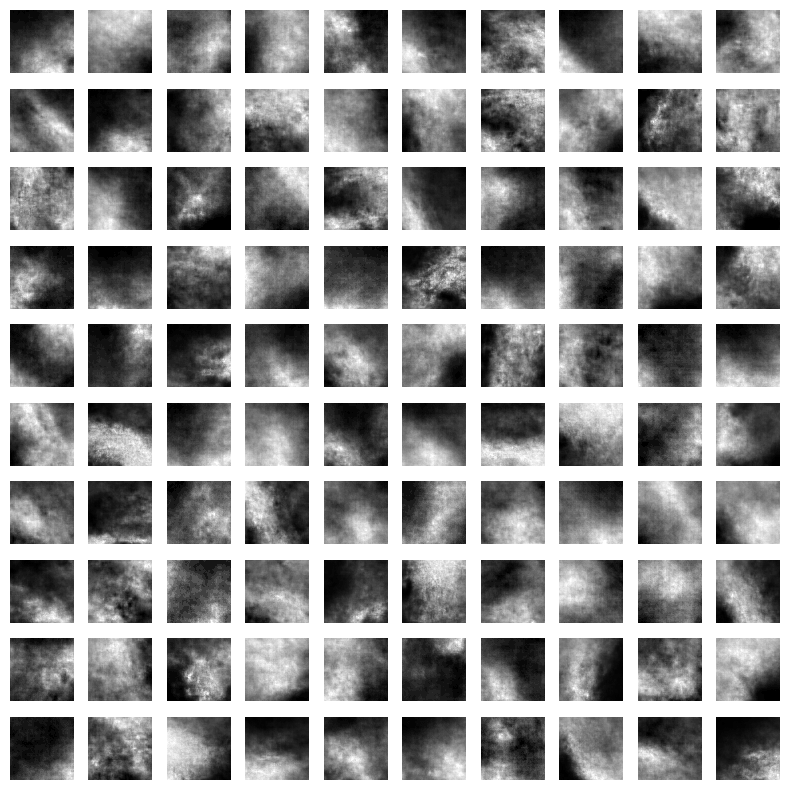

In [5]:
import time
import numpy as np
import tensorflow as tf

num_samples = 100  # Generate one image at a time
images = []
loaded_model = tf.keras.models.load_model('./decoders/decoder_64s_64bs_64ld_0.0008lr.h5')

def generate_images():
    random_latent_vectors = tf.random.normal(shape=(num_samples, 64))
    generated_images = loaded_model.predict(random_latent_vectors)
    generated_images *= 255
    for i in range(num_samples):
        img = generated_images[i].astype(np.uint8)
        images.append(img)
    return images

# Time the generation of one image
start_time = time.time()
_ = generate_images()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to generate {num_samples} images: {elapsed_time:.5f} seconds")

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8,8))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()
